# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Execute get request for each request url
btc_request = requests.get(btc_url)
print(btc_request)
eth_request = requests.get(eth_url)
print(eth_request)

# Import request url data using json function to format as json
btc_data = btc_request.json()
eth_data = eth_request.json()

print(json.dumps(btc_data, indent=4))
print(json.dumps(eth_data, indent=4))

<Response [200]>
<Response [200]>
{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18889625,
            "total_supply": 18889625,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 56628.0,
                    "volume_24h": 33385409812,
                    "market_cap": 1070120750404,
                    "percentage_change_1h": 0.287897786738638,
                    "percentage_change_24h": 0.187328529068504,
                    "percentage_change_7d": -3.85331744574216,
                    "percent_change_1h": 0.287897786738638,
                    "percent_change_24h": 0.187328529068504,
                    "percent_change_7d": -3.85331744574216
                },
                "CAD": {
                    "price": 72585.7704,
                    "volume_24h": 42

In [5]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(f"${btc_price:0.2f}")

# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(f"${eth_price:0.2f}")

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

$56628.00
$4534.88
The current value of your 1.2 BTC is $67953.60
The current value of your 5.3 ETH is $24034.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-11-30", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_stocks_bonds = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
my_stocks_bonds

AGG                                      SPY  \
                             open      high    low    close    volume open   
time                                                                         
2021-11-30 00:00:00-05:00  114.87  115.1074  114.5  114.765  10624796  462   

                                                             
                             high    low   close     volume  
time                                                         
2021-11-30 00:00:00-05:00  464.03  455.3  455.78  126435765

In [9]:
# Pick AGG and SPY close prices
agg_close_price = my_stocks_bonds.iloc[0]["AGG"]["close"]
spy_close_price = my_stocks_bonds.iloc[0]["SPY"]["close"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.765
Current SPY closing price: $455.78


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22789.00
The current value of your 200 AGG shares is $22953.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_crypto = my_btc_value + my_eth_value
total_stocks_bonds = my_spy_value + my_agg_value
savings_df = pd.DataFrame(data=[total_crypto, total_stocks_bonds],index=["crypto","shares"],columns=["amount"])

# Display savings DataFrame
display(savings_df)

,amount
crypto,91988.464
shares,45742.000


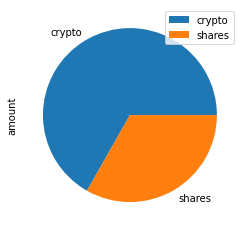

In [12]:
# Plot savings pie chart
savings_df.plot(kind="pie", y="amount");

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stocks_bonds
print(f"Your total savings are: ${total_savings:0.2f}")

# Validate saving health
if total_savings > emergency_fund:
    savings_surplus = total_savings - emergency_fund
    print(f"Congratulations, your current total savings exceed your financial savings target by: ${savings_surplus:0.2f}!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financials goals with total savings equal to your financial savings target!")
else:
    savings_shortage = emergency_fund - total_savings
    print(f"You missed your financial goal by: ${savings_shortage:0.2f}!")

Your total savings are: $137730.46
Congratulations, your current total savings exceed your financial savings target by: $101730.46!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-01', tz='America/New_York').isoformat()

In [15]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get maximum daily historical data for SPY and AGG (1000 days limited by API)
historical_data_df = alpaca_api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Clean n/a's and see sample data
historical_data_df.dropna(inplace=True)
historical_data_df.head()

AGG                                         SPY  \
                             open    high      low   close     volume    open   
time                                                                            
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0  266.59   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0  267.06   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0  267.12   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0  265.45   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0  268.08   

                                                                
                             high      low   close      volume  
time                                                            
2017-12-12 00:00:00-05:00  267.32  266.345  266.79  46482549.0  
2017-12-13 00:00:00-05:00  267.56  266.650  266.73  48961663.0  
2017-12-14 00:00:00-05:00  267.22  265.600  265.67  57343318.0  
2017-12-15 00:00:00-05:00  267.04  265.390  266.53  59269913.0  
2017-12-18 00:00:00-05:00  268.60  267.980  268.18  45691370.0

In [16]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr_simulation = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [17]:
# Printing the simulation input data
MC_30yr_simulation.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-12 00:00:00-05:00          NaN  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.600  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.390  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.980  268.18   

                                                    
                               volume daily_return  
time                                                
2017-12-12 00:00:00-05:00  46482549.0          NaN  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225  
2017-12-14 00:00:00-05:00  57343318.0    -0.003974  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30yr_simulation.calc_cumulative_return() 

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013141,0.994361,1.008527,0.981207,0.999438,0.993954,1.001762,1.008453,1.001489,1.009755,...,0.985920,0.997136,0.988269,0.992060,1.006264,0.998718,0.997336,1.000821,0.993251,0.998193
2,1.005884,0.996421,1.010689,0.975395,1.008016,0.999135,1.001058,1.010858,0.990847,1.006628,...,0.990609,0.992076,0.986762,1.006058,1.008846,1.008414,0.993475,1.005849,0.993582,0.991155
3,1.004244,1.002393,1.006200,0.961454,1.000029,1.009034,1.003188,1.003089,0.990089,0.995790,...,0.986545,0.982557,0.988422,1.009146,1.010869,1.004619,1.010933,1.004019,0.984147,1.000357
4,1.004379,1.000786,1.012873,0.971846,0.995778,1.007771,1.001098,1.006955,0.980532,1.000109,...,0.992655,0.992200,0.994550,1.022569,1.018913,1.000248,1.026664,1.006587,0.984527,1.010664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.573319,16.509630,4.678830,8.844237,4.416530,21.956309,7.265773,13.954845,15.069714,26.991457,...,8.985125,19.492901,5.299237,21.995443,13.793514,26.906746,16.049862,25.364932,34.709658,33.240734
7557,21.249500,16.522201,4.693298,8.804997,4.434227,21.774406,7.183331,14.066484,15.121417,26.874382,...,8.884976,19.565662,5.278873,22.055187,13.793964,26.624554,16.110393,25.902251,34.585866,33.102894
7558,21.367158,16.523390,4.656403,8.849471,4.474060,21.535741,7.206758,14.029593,15.045526,26.935282,...,8.820191,19.705405,5.276529,21.646618,13.901027,27.085372,16.056913,25.916580,34.862521,33.305103
7559,21.331896,16.505239,4.630987,8.927254,4.460060,21.710514,7.060325,13.965589,15.169433,26.833056,...,8.773704,19.889559,5.242996,21.102136,14.075174,27.151553,16.056351,26.058882,35.040050,33.159375


In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

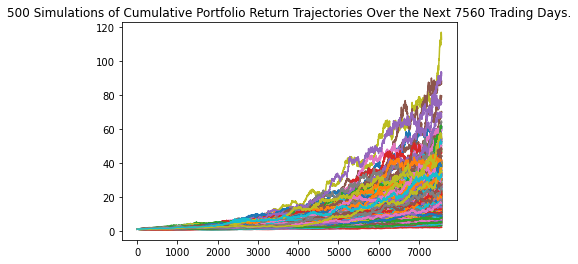

In [20]:
# Plot simulation outcomes
MC_30yr_line_plot = MC_30yr_simulation.plot_simulation()

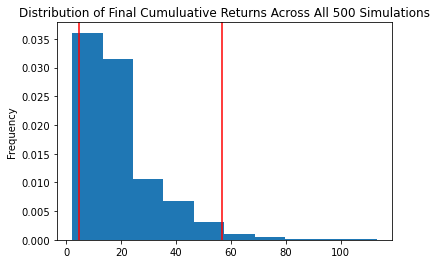

In [21]:
# Plot probability distribution and confidence intervals
MC_30yr_dist_plot = MC_30yr_simulation.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the 30yr Monte Carlo simulation results
MC_30yr_summary = MC_30yr_simulation.summarize_cumulative_return()

# Print 30yr summary statistics
print(MC_30yr_summary)

count           500.000000
mean             19.773596
std              14.515885
min               2.093798
25%               9.794659
50%              15.914447
75%              24.180492
max             113.013292
95% CI Lower      4.556701
95% CI Upper     56.567995
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [44]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30yr_summary[8]*initial_investment,2)
ci_upper = round(MC_30yr_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $91134.02 and $1131359.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30yr_summary[8]*initial_investment,2)
ci_upper = round(MC_30yr_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $136701.04 and $1697039.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_simulation = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Printing the simulation input data
MC_5yr_simulation.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-12 00:00:00-05:00          NaN  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.600  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.390  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.980  268.18   

                                                    
                               volume daily_return  
time                                                
2017-12-12 00:00:00-05:00  46482549.0          NaN  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225  
2017-12-14 00:00:00-05:00  57343318.0    -0.003974  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005246,1.013296,1.004264,0.984537,1.002729,1.010704,1.009302,0.997751,0.996650,0.999153,...,1.006716,0.995766,1.018709,1.000105,1.002397,0.997984,1.007851,1.006472,0.989594,0.989258
2,1.014125,1.018353,1.004944,0.976421,1.014105,1.011645,1.023534,0.996973,1.004996,0.987872,...,1.004109,0.992870,1.025912,1.013184,1.003237,0.991225,1.011635,0.997534,0.994018,0.986248
3,1.018467,1.016728,1.006796,0.965707,1.018027,1.014558,1.020273,0.997102,1.006933,0.985257,...,0.993335,1.006142,1.029578,1.026668,0.987623,0.997646,1.024006,1.000873,0.991036,0.989583
4,1.022324,1.021537,0.999517,0.963767,1.009385,1.004465,1.013120,0.990462,1.002617,0.987626,...,0.999911,0.999320,1.024942,1.023646,0.991675,0.993882,1.014577,0.987014,0.990295,0.976703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.073730,1.593700,1.960746,1.461002,1.136789,1.183073,1.311232,2.294194,1.150331,1.650151,...,1.681055,2.100391,2.409370,1.875985,1.801055,1.333685,2.435676,1.138418,1.977512,1.411558
1257,2.050615,1.600000,1.932856,1.478084,1.144449,1.176754,1.322152,2.292202,1.165433,1.646093,...,1.680460,2.075882,2.432792,1.902575,1.802708,1.346251,2.432444,1.132528,1.974400,1.405882
1258,2.054135,1.599693,1.938452,1.490370,1.145324,1.168513,1.317907,2.303906,1.162427,1.637535,...,1.697602,2.087637,2.435695,1.907163,1.797085,1.350818,2.459953,1.121287,1.973799,1.419795
1259,2.073918,1.596774,1.924380,1.478356,1.135053,1.171806,1.317908,2.262300,1.186410,1.653985,...,1.678368,2.108302,2.409131,1.869075,1.813520,1.360255,2.434406,1.117214,1.979656,1.426792


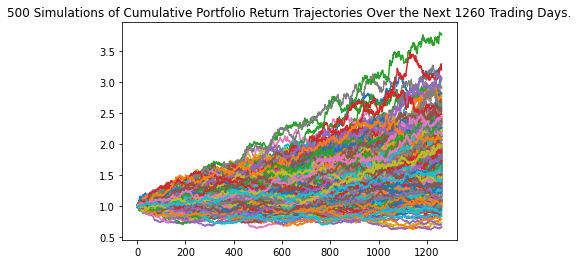

In [28]:
# Plot probability distribution and confidence intervals
MC_5yr_line_plot = MC_5yr_simulation.plot_simulation()

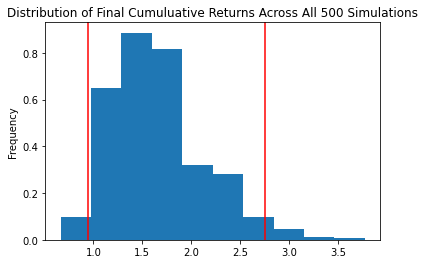

In [29]:
# Plot probability distribution and confidence intervals
MC_5yr_dist_plot = MC_5yr_simulation.plot_distribution()

In [30]:
# Fetch summary statistics from the 5yr Monte Carlo simulation results
MC_5yr_summary = MC_5yr_simulation.summarize_cumulative_return()

# Print 5yr summary statistics
print(MC_5yr_summary)

count           500.000000
mean              1.656270
std               0.476254
min               0.662807
25%               1.306946
50%               1.584420
75%               1.891749
max               3.776169
95% CI Lower      0.944395
95% CI Upper      2.756946
Name: 1260, dtype: float64


In [42]:
# Set initial investment
initial_investment_5yr = initial_investment * (MC_30yr_summary[9]/MC_5yr_summary[9])
print(f"${initial_investment_5yr:0.2f}")

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our calculated starting investment
# The upper 95% outcome should align with the 30 year MC simulation upper 95% outcome
ci_lower_five = round(MC_5yr_summary[8]*initial_investment_5yr,2)
ci_upper_five = round(MC_5yr_summary[9]*initial_investment_5yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr:0.2f} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

$615550.70
There is a 95% chance that an initial investment of $615550.70 in the portfolio over the next 5 years will end within the range of $581322.85 and $1697039.84


In [32]:
# If statement to prove math checks out
if ci_upper_five == ci_upper:
    print(f"Your initial investment of ${initial_investment_5yr:0.2f} invested over 5 years has an upper 95% confidence final value of ${ci_upper_five:0.2f}, identical to the upper 95% confidence final value achieved if investing ${initial_investment:0.2f} over 30 years")
else:
    print(f"Check your math")

Your initial investment of $615550.70 invested over 5 years has an upper 95% confidence final value of $1697039.84, identical to the upper 95% confidence final value achieved if investing $30000.00 over 30 years


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_simulation = MCSimulation(
    portfolio_data = historical_data_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [34]:
# Printing the simulation input data
MC_10yr_simulation.portfolio_data.head()

AGG                                      \
                             open    high      low   close     volume   
time                                                                    
2017-12-12 00:00:00-05:00  109.07  109.11  108.950  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.135  109.41  2638160.0   
2017-12-14 00:00:00-05:00  109.31  109.51  109.230  109.45  3698172.0   
2017-12-15 00:00:00-05:00  109.42  109.55  109.315  109.47  2034072.0   
2017-12-18 00:00:00-05:00  109.47  109.47  109.250  109.31  3090761.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-12 00:00:00-05:00          NaN  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   
2017-12-14 00:00:00-05:00     0.000366  267.12  267.22  265.600  265.67   
2017-12-15 00:00:00-05:00     0.000183  265.45  267.04  265.390  266.53   
2017-12-18 00:00:00-05:00    -0.001462  268.08  268.60  267.980  268.18   

                                                    
                               volume daily_return  
time                                                
2017-12-12 00:00:00-05:00  46482549.0          NaN  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225  
2017-12-14 00:00:00-05:00  57343318.0    -0.003974  
2017-12-15 00:00:00-05:00  59269913.0     0.003237  
2017-12-18 00:00:00-05:00  45691370.0     0.006191

In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987210,0.989724,1.003763,1.008158,1.002214,0.990071,0.997182,1.002527,0.995316,0.997494,...,1.005338,1.001502,1.009536,0.996215,0.992649,1.004948,1.020290,0.992565,0.993784,0.990110
2,0.995037,0.978421,1.012070,0.989893,1.013004,0.995876,1.008902,1.008970,1.004541,0.993866,...,1.004992,1.009156,1.010676,0.987624,1.001883,0.994142,1.029889,0.995882,0.996515,0.991756
3,0.993882,0.983075,1.021776,0.994144,1.028875,1.013502,1.025270,1.011600,0.981620,0.995275,...,1.027166,1.001504,1.023563,0.983371,0.999697,1.000735,1.017579,0.994855,0.992503,0.984813
4,0.997032,0.976224,1.005156,1.004271,1.032782,1.026431,1.017305,1.002224,0.987136,0.999726,...,1.023165,1.009885,1.017351,0.988168,0.995930,0.997636,1.024985,0.990205,0.994153,0.979707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.580567,3.361994,1.459963,3.527912,3.012193,1.339560,3.022720,2.712305,2.107705,4.113181,...,0.879439,1.673150,3.164594,3.379075,2.109582,1.540735,3.013740,2.058795,1.313596,3.349744
2517,2.562931,3.348291,1.451610,3.553060,3.023633,1.353625,3.010386,2.731211,2.105376,4.096590,...,0.870881,1.688736,3.131961,3.413132,2.127048,1.553852,3.019612,2.037714,1.328264,3.359676
2518,2.577155,3.328423,1.430167,3.556110,2.996451,1.352530,3.019499,2.741798,2.116285,4.160456,...,0.887914,1.699082,3.092161,3.393535,2.148283,1.557056,3.023161,2.051023,1.325647,3.399802
2519,2.577597,3.307299,1.432311,3.585050,2.990104,1.334745,3.040451,2.708407,2.122880,4.162997,...,0.875138,1.711606,3.078029,3.400998,2.162424,1.549269,3.014018,2.064912,1.332757,3.386053


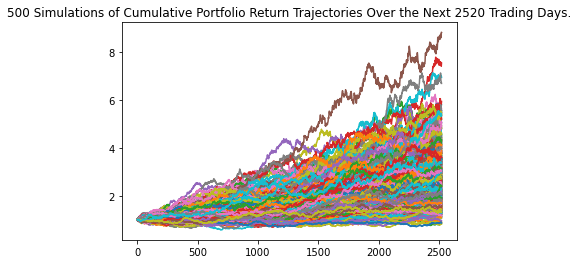

In [36]:
# Plot simulation outcomes
MC_10yr_line_plot = MC_10yr_simulation.plot_simulation()

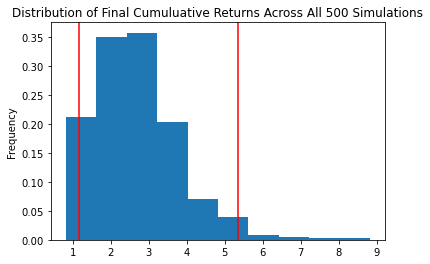

In [37]:
# Plot probability distribution and confidence intervals
MC_10yr_dist_plot = MC_10yr_simulation.plot_distribution()

In [38]:
# Fetch summary statistics from the 10yr Monte Carlo simulation results
MC_10yr_summary = MC_10yr_simulation.summarize_cumulative_return()

# Print 10yr summary statistics
print(MC_10yr_summary)

count           500.000000
mean              2.674528
std               1.102232
min               0.817539
25%               1.829581
50%               2.561145
75%               3.302914
max               8.826197
95% CI Lower      1.168712
95% CI Upper      5.357299
Name: 2520, dtype: float64


In [43]:
# Set initial investment
initial_investment_10yr = initial_investment * (MC_30yr_summary[9]/MC_10yr_summary[9])
print(f"${initial_investment_10yr:0.2f}")

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our calculated starting investment
# The upper 95% outcome should align with the 30 year MC simulation upper 95% outcome
ci_lower_ten = round(MC_10yr_summary[8]*initial_investment_10yr,2)
ci_upper_ten = round(MC_10yr_summary[9]*initial_investment_10yr,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr:0.2f} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

$316771.55
There is a 95% chance that an initial investment of $316771.55 in the portfolio over the next 10 years will end within the range of $370214.83 and $1697039.84


In [40]:
# If statement to prove math checks out
if ci_upper_ten == ci_upper:
    print(f"Your initial investment of ${initial_investment_10yr:0.2f} invested over 10 years has an upper 95% confidence final value of ${ci_upper_ten:0.2f}, identical to the upper 95% confidence final value achieved if investing ${initial_investment:0.2f} over 30 years")
else:
    print(f"Check your math")

Your initial investment of $316771.55 invested over 10 years has an upper 95% confidence final value of $1697039.84, identical to the upper 95% confidence final value achieved if investing $30000.00 over 30 years
